# Machine Learning

In this section, we determined which model would be best to use to classify whether our news data is fake or real.

In [0]:
import pandas as pd

df_news = pd.read_csv('https://raw.githubusercontent.com/guneetskohli/DATA301/master/filtered_news.csv')

In [0]:
df_news.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df_news.head()

,title,url,content,fake,title_len,content_len
0,Sportless TV goes all nostalgic on a truly sur...,https://www.theguardian.com/sport/2020/mar/15/...,"So, the show doesn’t have to go on after all. ...",0,13,862
1,Nation Perplexed By 16-Year-Old Who Doesn’t Wa...,https://www.theonion.com/nation-perplexed-by-1...,Following her U.N. address about the existenti...,1,10,197
2,Inconsolable Jeff Sessions Tries To Commit Sui...,https://politics.theonion.com/inconsolable-jef...,Following months of bruising criticism from De...,1,10,129
3,Israel's opposition head Benny Gantz wins supp...,https://www.theguardian.com/world/2020/mar/15/...,Israeli political parties have backed the oppo...,0,10,1053
4,"‘No Way To Prevent This,’ Says Only Nation Whe...",https://www.theonion.com/no-way-to-prevent-thi...,In the days following a violent rampage in sou...,1,12,200


# Setting up Column Transformers and y_train Data

Since we are using classifier models, we need to make real and fake filtered series for determinig our test metrics.

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

y_train = df_news['fake']
real = (y_train == 0)
fake = (y_train == 1)

cts = [
make_column_transformer(
    (StandardScaler(), ['title_len']),
    (TfidfVectorizer(norm=None), 'title')
),
make_column_transformer(
    (StandardScaler(), ['content_len']),
    (TfidfVectorizer(norm=None), 'content')
),
make_column_transformer(
    (StandardScaler(), ['title_len', 'content_len']),
    (TfidfVectorizer(norm=None), 'title'),
    (TfidfVectorizer(norm=None), 'content')
)]

features_list = [["title", "title_len"],
                 ["content", "content_len"],
                 ["title", "title_len", "content", "content_len"]]
results_dict = {"Model" : [], "Features" : [], "Accuracy" : [], 
                "Precision (Real)" : [], "Precision (Fake)" : [],
                "Recall (Real)" : [], "Recall (Fake)" : [],
                "F1 (Real)" : [], "F1 (Fake)" : []}

# Determining Classification Test Metrics for Different Models

### Model Selection and Reasoning

Some of the models we chose to use in the machine learning portion were selected due to previous use but required additional research to determine the optimal classifiers for fake news detection.

* K-Neighbors Classifier
> We used the K Neighbors Classifier simply because it was the first type of classifier we learned about in our lessons.
* Passive Aggressive Classifier
> Extra research was done to choose this classifier. Just based off of the name, we thought it would be perfect for our project, but upon doing further research it appears that it works well when performing predictions on large streams of data, like a ton of Twitter tweets. This makes it very applicable to our project as we have a lot of articles to train our model on. (https://www.youtube.com/watch?v=TJU8NfDdqNQ)
* Random Forest Classifier
> This classifier was selected primarily because we used it was recommended and used in our Kaggle competition machine learning models and was found to perform very well in prediciting data.
* Linear SVC Classifier
> We found this classifier when doing our research and found it to be useful for our project because it works by creating a separating line between our data of two classes (real and fake). This is in a similar way to clustering and makes a great classifier for our fake news detection model. (https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)
* Logistic Regression Classifier
> The Logistic Regression model was chosen because it is a classification algorithm that is similar to linear regression because it uses an equation for its predictions, but a sigmoid one instead to account for outliers. It also outputs binary values and their probabilities as opposed to numeric ones like in Linear Regression. (https://towardsdatascience.com/logistic-regression-classifier-8583e0c3cf9)

In [22]:
classifiers_list = [
     KNeighborsClassifier(n_neighbors=5),  
     PassiveAggressiveClassifier(),
     RandomForestClassifier(),
     LinearSVC(dual=False),
     LogisticRegression()
]

models = [
     'KNeighbors',
     'PassiveAggressive',
     'RandomForest',
     'LinearSVC',
     'LogisticRegression'
]

i = 0
j = 0
for classifier in classifiers_list:
  for features in features_list:
    pipeline = make_pipeline(
      cts[i],
      classifier
    )

    results_dict['Model'].append(models[j])
    results_dict['Features'].append(str(features))
    results_dict['Accuracy'].append(cross_val_score(pipeline, df_news[features], y_train, 
                              cv=10, scoring="accuracy").mean())
    results_dict['Precision (Real)'].append(cross_val_score(pipeline, df_news[features], real, 
                              cv=10, scoring="precision").mean())
    results_dict['Precision (Fake)'].append(cross_val_score(pipeline, df_news[features], fake, 
                              cv=10, scoring="precision").mean())
    results_dict['Recall (Real)'].append(cross_val_score(pipeline, df_news[features], real, 
                              cv=10, scoring="recall").mean())
    results_dict['Recall (Fake)'].append(cross_val_score(pipeline, df_news[features], fake, 
                              cv=10, scoring="recall").mean())
    results_dict['F1 (Real)'].append(cross_val_score(pipeline, df_news[features], real, 
                              cv=10, scoring="f1").mean())
    results_dict['F1 (Fake)'].append(cross_val_score(pipeline, df_news[features], fake, 
                              cv=10, scoring="f1").mean())
    
    i = i + 1
  j = j + 1
  i = 0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

# Generate a DataFrame of the results

In [23]:
df_results = pd.DataFrame(results_dict)
df_results

,Model,Features,Accuracy,Precision (Real),Precision (Fake),Recall (Real),Recall (Fake),F1 (Real),F1 (Fake)
0,KNeighbors,"['title', 'title_len']",0.569144,0.554409,0.600000,1.000000,0.076471,0.712937,0.133275
1,KNeighbors,"['content', 'content_len']",0.629505,1.000000,0.558746,0.305526,1.000000,0.460096,0.716460
2,KNeighbors,"['title', 'title_len', 'content', 'content_len']",0.645871,1.000000,0.571415,0.336053,1.000000,0.490978,0.726348
3,PassiveAggressive,"['title', 'title_len']",0.861411,0.865832,0.853553,0.882368,0.824510,0.868589,0.843934
4,PassiveAggressive,"['content', 'content_len']",0.945270,0.977709,0.907826,0.912368,0.965033,0.938496,0.943619
5,PassiveAggressive,"['title', 'title_len', 'content', 'content_len']",0.967117,0.989737,0.951954,0.943421,0.988235,0.965532,0.966177
6,RandomForest,"['title', 'title_len']",0.790390,0.754223,0.892892,0.928684,0.620261,0.813872,0.728621
7,RandomForest,"['content', 'content_len']",0.945270,0.995238,0.895506,0.891842,0.988235,0.927040,0.943136
8,RandomForest,"['title', 'title_len', 'content', 'content_len']",0.939715,0.989683,0.899553,0.896842,1.000000,0.934441,0.945493
9,LinearSVC,"['title', 'title_len']",0.853303,0.849287,0.866216,0.887632,0.813072,0.866479,0.836207


# Analysis of Results to Determine Optimal Features

When grouping by features and observing the different test metric results, we can see that across the board, incoporating title, content, and their lengths yield the best results for accuracy, precision, recall, and f1 score. From here, we can also observe that when the title is the only feature, its test metric results are the lowest performing. This makes sense intuitively because as observed from our data exploration, the lengths of the titles are similar making it difficult for our models to discern article credibility based on title alone. However, once it is given the context of the article's content, the models perform a lot better. Given the title and content it performs marginally better than content alone, but still better in every case.

In [24]:
print(df_results.groupby(['Features'])['Accuracy'].mean().sort_values())
print(df_results.groupby(['Features'])['Precision (Real)'].mean().sort_values())
print(df_results.groupby(['Features'])['Precision (Fake)'].mean().sort_values())
print(df_results.groupby(['Features'])['Recall (Real)'].mean().sort_values())
print(df_results.groupby(['Features'])['Recall (Fake)'].mean().sort_values())
print(df_results.groupby(['Features'])['F1 (Real)'].mean().sort_values())
print(df_results.groupby(['Features'])['F1 (Fake)'].mean().sort_values())

Features
['title', 'title_len']                              0.782192
['content', 'content_len']                          0.873378
['title', 'title_len', 'content', 'content_len']    0.887583
Name: Accuracy, dtype: float64
Features
['title', 'title_len']                              0.767566
['content', 'content_len']                          0.993637
['title', 'title_len', 'content', 'content_len']    0.995884
Name: Precision (Real), dtype: float64
Features
['title', 'title_len']                              0.818804
['content', 'content_len']                          0.819883
['title', 'title_len', 'content', 'content_len']    0.842338
Name: Precision (Fake), dtype: float64
Features
['content', 'content_len']                          0.765368
['title', 'title_len', 'content', 'content_len']    0.791105
['title', 'title_len']                              0.921368
Name: Recall (Real), dtype: float64
Features
['title', 'title_len']                              0.617712
['content', 'cont

# Analysis of Results to Determine the Optimal Model

Once we have determined the optimal set of features for our models, we can select which model would be the best for determining if our news are fake or real. This was achieved by observing which model had the highest test metric scores for Accuracy, Precision, Recall, and F1.

In [8]:
df_best_feat = df_results[df_results['Features'] == '[\'title\', \'title_len\', \'content\', \'content_len\']'].copy()
df_best_feat.set_index('Model', inplace=True)
df_best_feat

,Features,Accuracy,Precision (Real),Precision (Fake),Recall (Real),Recall (Fake),F1 (Real),F1 (Fake)
Model,,,,,,,,
KNeighbors,"['title', 'title_len', 'content', 'content_len']",0.645871,1.000000,0.571415,0.336053,1.000000,0.490978,0.726348
PassiveAggressive,"['title', 'title_len', 'content', 'content_len']",0.961712,0.994737,0.940024,0.943421,0.994118,0.970820,0.963458
RandomForest,"['title', 'title_len', 'content', 'content_len']",0.942492,0.989975,0.896191,0.881842,0.994118,0.938624,0.948570
LinearSVC,"['title', 'title_len', 'content', 'content_len']",0.929054,1.000000,0.870326,0.861842,1.000000,0.924906,0.930083
LogisticRegression,"['title', 'title_len', 'content', 'content_len']",0.956156,1.000000,0.918442,0.917368,1.000000,0.955515,0.956520


Overall, we found that our Passive Agressive Classifier Model performed the best in the majority of the test metrics. 

In [26]:
print("Best model for Accuracy: " + df_best_feat['Accuracy'].idxmax())
print("Best model for Precision (Real): " + df_best_feat['Precision (Real)'].idxmax())
print("Best model for Precision (Fake): " + df_best_feat['Precision (Fake)'].idxmax())
print("Best model for Recall (Real): " + df_best_feat['Recall (Real)'].idxmax())
print("Best model for Recall (Fake): " + df_best_feat['Recall (Fake)'].idxmax())
print("Best model for F1 (Real): " + df_best_feat['F1 (Real)'].idxmax())
print("Best model for F1 (Fake): " + df_best_feat['F1 (Fake)'].idxmax())

Best model for Accuracy: PassiveAggressive
Best model for Precision (Real): KNeighbors
Best model for Precision (Fake): PassiveAggressive
Best model for Recall (Real): PassiveAggressive
Best model for Recall (Fake): KNeighbors
Best model for F1 (Real): PassiveAggressive
Best model for F1 (Fake): PassiveAggressive


# Tuning the HyperParameters for each Model

We evaluated the hyperparameters on the average F1 score because accuracy would not have been an accurate metric to evaluate them on due to the idea of false positives and false negatives. 

In [0]:
X_train = df_news[["title", "title_len", "content", "content_len"]]

ct = make_column_transformer(
    (StandardScaler(), ['title_len', 'content_len']),
    (TfidfVectorizer(norm=None), 'title'),
    (TfidfVectorizer(norm=None), 'content')
)

,# of Neighbors,F1
1,2,0.847433
0,1,0.832878
3,4,0.719251
2,3,0.712803
4,5,0.608663


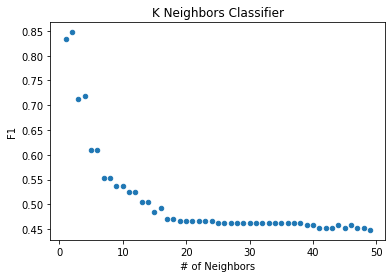

In [11]:
tests = {
    "# of Neighbors" : [],
    "F1":[],
}

for k in range(1, 50):
  pipeline = make_pipeline(
      ct,
      KNeighborsClassifier(n_neighbors=k)
  ) 
  f1 =  cross_val_score(pipeline, X=X_train, y=y_train,
                             scoring="f1_macro", cv=10).mean()
  tests['# of Neighbors'].append(k)
  tests['F1'].append(f1)
    
df_tuned_KN = pd.DataFrame(tests)
df_tuned_KN.plot.scatter(x='# of Neighbors', \
                         y='F1', \
                         title='K Neighbors Classifier')
df_tuned_KN.sort_values(by='F1', ascending=False).head()


,# of Estimators,F1
37,38,0.953364
43,44,0.947633
45,46,0.945093
35,36,0.942312
42,43,0.942201


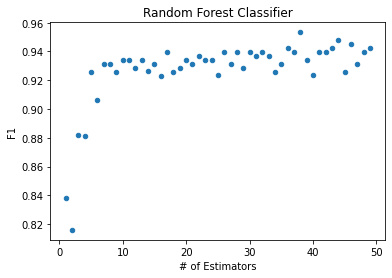

In [12]:
tests = {
    "# of Estimators" : [],
    "F1":[],
}

for n in range(1, 50):
  pipeline = make_pipeline(
      ct,
      RandomForestClassifier(n_estimators=n)
  ) 
  f1 =  cross_val_score(pipeline, X=X_train, y=y_train,
                             scoring="f1_macro", cv=10).mean()
  tests['# of Estimators'].append(n)
  tests['F1'].append(f1)
    
df_tuned_RF = pd.DataFrame(tests)
ax = df_tuned_RF.plot.scatter(x='# of Estimators', \
                         y='F1', \
                         title='Random Forest Classifier')
df_tuned_RF.sort_values(by='F1', ascending=False).head()

K Neighbors and Random Forest were easy to vary the hyperparameters. However, the other 3 models yielded strange results when varying some of the parameters. 

,C Value,F1
29,30,0.972558
28,29,0.969857
42,43,0.969848
12,13,0.969836
25,26,0.969783


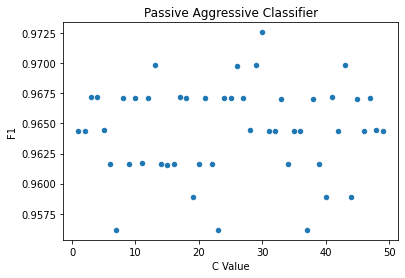

In [13]:
tests = {
    "C Value" : [],
    "F1":[],
}

for c_val in range(1, 50):
  pipeline = make_pipeline(
      ct,
      PassiveAggressiveClassifier(C=c_val)
  ) 
  f1 =  cross_val_score(pipeline, X=X_train, y=y_train,
                             scoring="f1_macro", cv=10).mean()
  tests['C Value'].append(c_val)
  tests['F1'].append(f1)
    
df_tuned_PA = pd.DataFrame(tests)
df_tuned_PA.plot.scatter(x='C Value', \
                         y='F1', \
                         title='Passive Aggressive Classifier')
df_tuned_PA.sort_values(by='F1', ascending=False).head()

,C Value,F1
0,1,0.928917
18,19,0.928917
32,33,0.928917
31,32,0.928917
35,36,0.928917


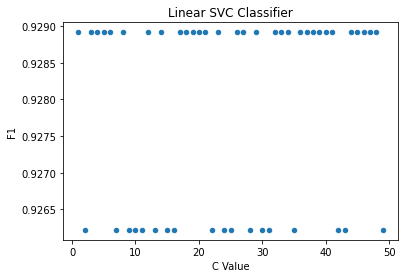

In [14]:
tests = {
    "C Value" : [],
    "F1":[],
}

for c_val in range(1, 50):
  pipeline = make_pipeline(
      ct,
      LinearSVC(C=c_val, dual=False)
  ) 
  f1 = cross_val_score(pipeline, X=X_train, y=y_train,
                             scoring="f1_macro", cv=10).mean()
  tests['C Value'].append(c_val)
  tests['F1'].append(f1)
    
df_tuned_SVC = pd.DataFrame(tests)
df_tuned_SVC.plot.scatter(x='C Value', \
                         y='F1', \
                         title='Linear SVC Classifier')
df_tuned_SVC.sort_values(by='F1', ascending=False).head()

,Value,F1
0,1,0.956017
25,26,0.956017
27,28,0.956017
28,29,0.956017
29,30,0.956017


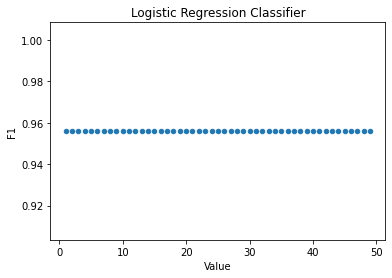

In [15]:
tests = {
    "Value" : [],
    "F1":[],
}

for c_val in range(1, 50):
  pipeline = make_pipeline(
      ct,
      LogisticRegression(C=c_val)
  ) 
  f1 = cross_val_score(pipeline, X=X_train, y=y_train,
                             scoring="f1_macro", cv=10).mean()
  tests['Value'].append(c_val)
  tests['F1'].append(f1)
    
df_tuned_LR = pd.DataFrame(tests)
df_tuned_LR.plot.scatter(x='Value', \
                         y='F1', \
                         title='Logistic Regression Classifier')
df_tuned_LR.sort_values(by='F1', ascending=False).head()

# Results: Optimal Hyperparameters

* K-Neighbors Classifier
> Optimal K-Neighbors - 2
* Passive Aggressive Classifier
> Optimal C Value (Varies with each run) - 30
* Random Forest Classifier
> Optimal N Estimators (Varies with each run) - 38
* Linear SVC Classifier
> Optimal C Value (F1 only had two results) - 1
* Logistic Regression Classifier
> Optimal C Value (F1 did not change) - 1

## Rerun the scores with the newly determined optimal hyperparameters

In [0]:
opt_results_dict = {"Model" : [], "Accuracy" : [], 
                "Precision (Real)" : [], "Precision (Fake)" : [],
                "Recall (Real)" : [], "Recall (Fake)" : [],
                "F1 (Real)" : [], "F1 (Fake)" : []}

classifiers_list = [
     KNeighborsClassifier(n_neighbors=2),  
     PassiveAggressiveClassifier(C=30),
     RandomForestClassifier(n_estimators=38),
     LinearSVC(C=1, dual=False),
     LogisticRegression(C=1)
]

models = [
     'KNeighbors',
     'PassiveAggressive',
     'RandomForest',
     'LinearSVC',
     'LogisticRegression'
]

j = 0
for classifier in classifiers_list:
  pipeline = make_pipeline(
    ct,
    classifier
  )

  opt_results_dict['Model'].append(models[j])
  opt_results_dict['Accuracy'].append(cross_val_score(pipeline, X_train, y_train, 
                            cv=10, scoring="accuracy").mean())
  opt_results_dict['Precision (Real)'].append(cross_val_score(pipeline, X_train, real, 
                            cv=10, scoring="precision").mean())
  opt_results_dict['Precision (Fake)'].append(cross_val_score(pipeline, X_train, fake, 
                            cv=10, scoring="precision").mean())
  opt_results_dict['Recall (Real)'].append(cross_val_score(pipeline, X_train, real, 
                            cv=10, scoring="recall").mean())
  opt_results_dict['Recall (Fake)'].append(cross_val_score(pipeline, X_train, fake, 
                            cv=10, scoring="recall").mean())
  opt_results_dict['F1 (Real)'].append(cross_val_score(pipeline, X_train, real, 
                            cv=10, scoring="f1").mean())
  opt_results_dict['F1 (Fake)'].append(cross_val_score(pipeline, X_train, fake, 
                            cv=10, scoring="f1").mean())
  j = j + 1

# Analysis of Results to Determine the Optimal Model (Now with Tuned Hyperparameters)

Given the optimal set of features and hyperparameters, we can again select which model would be the best for determining if our news are fake or real. This was achieved by observing which model had the highest test metric scores for Accuracy, Precision, Recall, and F1.

In [17]:
df_best_overall = pd.DataFrame(opt_results_dict)
df_best_overall.set_index('Model', inplace=True)
df_best_overall

,Accuracy,Precision (Real),Precision (Fake),Recall (Real),Recall (Fake),F1 (Real),F1 (Fake)
Model,,,,,,,
KNeighbors,0.849925,1.000000,0.770023,0.438158,0.988235,0.604979,0.862872
PassiveAggressive,0.964414,0.984474,0.939697,0.943421,0.982353,0.970532,0.963152
RandomForest,0.939865,0.995238,0.891779,0.891316,0.994118,0.929391,0.945968
LinearSVC,0.929054,1.000000,0.870326,0.861842,1.000000,0.924906,0.930083
LogisticRegression,0.956156,1.000000,0.918442,0.917368,1.000000,0.955515,0.956520


In [19]:
print("Best model for Accuracy: " + df_best_overall['Accuracy'].idxmax())
print("Best model for Precision (Real): " + df_best_overall['Precision (Real)'].idxmax())
print("Best model for Precision (Fake): " + df_best_overall['Precision (Fake)'].idxmax())
print("Best model for Recall (Real): " + df_best_overall['Recall (Real)'].idxmax())
print("Best model for Recall (Fake): " + df_best_overall['Recall (Fake)'].idxmax())
print("Best model for F1 (Real): " + df_best_overall['F1 (Real)'].idxmax())
print("Best model for F1 (Fake): " + df_best_overall['F1 (Fake)'].idxmax())

Best model for Accuracy: PassiveAggressive
Best model for Precision (Real): KNeighbors
Best model for Precision (Fake): PassiveAggressive
Best model for Recall (Real): PassiveAggressive
Best model for Recall (Fake): LinearSVC
Best model for F1 (Real): PassiveAggressive
Best model for F1 (Fake): PassiveAggressive


In [0]:
from google.colab import files

df_best_overall.to_csv('df_best_overall.csv')
files.download('df_best_overall.csv')

# **Machine Learning Conclusion**

From these results, we can observe that using all the features of the article, (title, title length, content, and content length) yields the best test metric scores for our models. We can also see that the Passive Agressive Classifier Model is again determined to be the best classifier for fake news detection, even after we have tuned our hyperparameters.